In [21]:
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
GM1_803 = pd.read_csv('GM1-803/GM1-803/Rocking_CuCrO2(006)_Ex1.0_mono_col2.0_AS0.6_MF_[13.3-18.8]_exported.xy', sep = ' ', header = 0, keep_default_na = False)

GM1_803 = GM1_803.iloc[:, [0,1]]
GM1_803.columns = ['Angle', 'Intensity']

In [9]:
GM1_804 = pd.read_csv('GM1-804/GM1-804/Rockingcurve_CuCrO2(006)_Ex1.0_mono_col2.0_AS0.6_MF_[15-16]_exported.xy', sep = ' ', header = 0, keep_default_na = False)

GM1_804 = GM1_804.iloc[:, [0,1]]
GM1_804.columns = ['Angle', 'Intensity']

In [13]:
GM1_805 = pd.read_csv('GM1-805/GM1-805/Rocking_CuCrO2(006)_Ex1.0_mono_col2.0_AS0.6_MF_[15-16]_exported.xy', sep = ' ', header = 0, keep_default_na = False)

GM1_805 = GM1_805.iloc[:, [0,1]]
GM1_805.columns = ['Angle', 'Intensity']

In [77]:
from lmfit.models import GaussianModel, LinearModel, LorentzianModel, VoigtModel

background = LinearModel(prefix = 'linear_')
lorentz = LorentzianModel(prefix = 'lorentz_')
gaussian = GaussianModel(prefix = 'gauss_')

pars = background.make_params(intercept = GM1_803['Intensity'].min(), slope = 0)
pars += lorentz.guess(GM1_803['Intensity'], x = GM1_803['Angle'])
pars.update(gaussian.make_params(center = dict(value = 15.7, min = 15.5, max = 16)))

mod = lorentz + background + gaussian
out = mod.fit(GM1_803['Intensity'], pars, x = GM1_803['Angle'])
comps = out.eval_components(x = GM1_803['Angle'])

In [75]:
print(out.fit_report())

[[Model]]
    ((Model(lorentzian, prefix='lorentz_') + Model(linear, prefix='linear_')) + Model(gaussian, prefix='gauss_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 230
    # data points      = 1089
    # variables        = 8
    chi-square         = 1097.32383
    reduced chi-square = 1.01510067
    Akaike info crit   = 24.2921756
    Bayesian info crit = 64.2362966
    R-squared          = 0.98324698
[[Variables]]
    linear_slope:      -0.03872380 +/- 0.01956065 (50.51%) (init = 0)
    linear_intercept:   0.85895806 +/- 0.31739706 (36.95%) (init = 0)
    lorentz_amplitude:  5.06468012 +/- 0.04285002 (0.85%) (init = 5.174063)
    lorentz_center:     15.6206111 +/- 9.1482e-05 (0.00%) (init = 15.6203)
    lorentz_sigma:      0.01494995 +/- 1.5216e-04 (1.02%) (init = 0.0125)
    lorentz_fwhm:       0.02989989 +/- 3.0433e-04 (1.02%) == '2.0000000*lorentz_sigma'
    lorentz_height:     107.835693 +/- 0.65969159 (0.61%) == '0.3183099*lorentz_amplitude/ma

(15.0, 16.5)

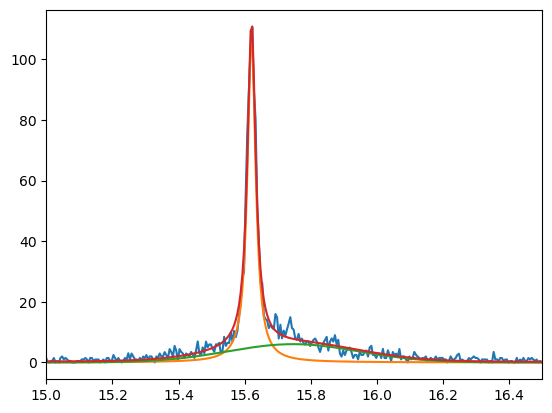

In [80]:
fig, ax = plt.subplots()
ax.plot(GM1_803['Angle'], GM1_803['Intensity'])
ax.plot(GM1_803['Angle'], comps['lorentz_'])
ax.plot(GM1_803['Angle'], comps['gauss_'])
ax.plot(GM1_803['Angle'], out.best_fit)
#ax.scatter(GM1_804['Angle'], GM1_804['Intensity'])
#ax.scatter(GM1_805['Angle'], GM1_805['Intensity'])
plt.xlim(15, 16.5)

(15.0, 16.5)

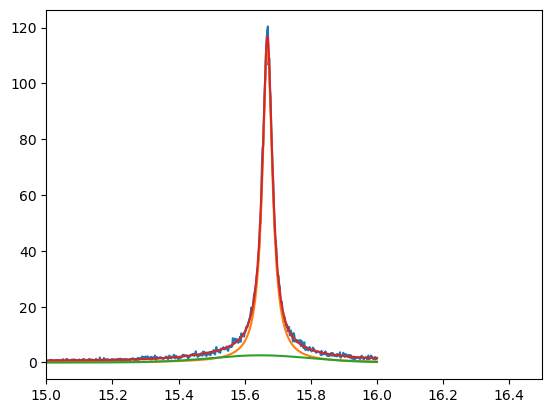

In [92]:
background = LinearModel(prefix = 'linear_')
lorentz = LorentzianModel(prefix = 'lorentz_')
gaussian = GaussianModel(prefix = 'gauss_')

pars = background.make_params(intercept = GM1_804['Intensity'].min(), slope = 0)
pars += lorentz.guess(GM1_804['Intensity'], x = GM1_804['Angle'])
pars.update(gaussian.make_params(center = dict(value = 15.7, min = 15.5, max = 16)))

mod = lorentz + background + gaussian
out = mod.fit(GM1_804['Intensity'], pars, x = GM1_804['Angle'])
comps = out.eval_components(x = GM1_804['Angle'])


fig, ax = plt.subplots()
ax.plot(GM1_804['Angle'], GM1_804['Intensity'])
ax.plot(GM1_804['Angle'], comps['lorentz_'])
ax.plot(GM1_804['Angle'], comps['gauss_'])
ax.plot(GM1_804['Angle'], out.best_fit)
plt.xlim(15, 16.5)

(15.0, 16.5)

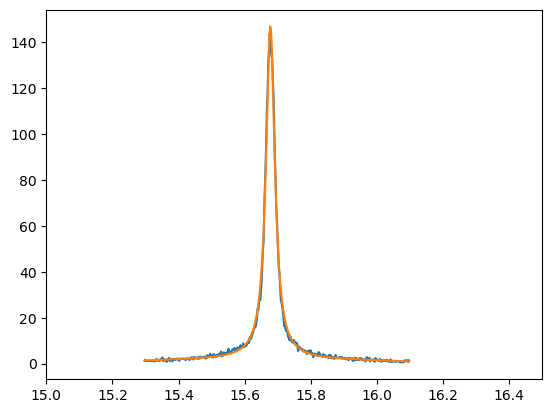

In [96]:
background = LinearModel(prefix = 'linear_')
lorentz = LorentzianModel(prefix = 'lorentz_')
gaussian = GaussianModel(prefix = 'gauss_')

pars = background.make_params(intercept = GM1_805['Intensity'].min(), slope = 0)
pars += lorentz.guess(GM1_805['Intensity'], x = GM1_805['Angle'])
pars.update(gaussian.make_params(center = dict(value = 15.7, min = 15.5, max = 16)))

mod = lorentz + background + gaussian
out = mod.fit(GM1_805['Intensity'], pars, x = GM1_805['Angle'])
comps = out.eval_components(x = GM1_805['Angle'])


fig, ax = plt.subplots()
ax.plot(GM1_805['Angle'], GM1_805['Intensity'])
#ax.plot(GM1_805['Angle'], comps['lorentz_'])
#ax.plot(GM1_805['Angle'], comps['gauss_'])
ax.plot(GM1_805['Angle'], out.best_fit)
plt.xlim(15, 16.5)